# Get data for BASE-9

This notebook tests my codes to grab data from Gaia, Pan-STARRS, and 2MASS, then use Gaia data to estimate membership probabilities, and output a phot file for BASE-9

### Gaia:
- https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html
- https://gea.esac.esa.int/archive/documentation/GEDR3/index.html

### Pan-STARRS:
- https://gaia.aip.de/metadata/gaiaedr3/panstarrs1_best_neighbour/
- https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_external_catalogues/ssec_dm_panstarrs1_original_valid.html
- https://allendowney.github.io/AstronomicalData/05_join.html

### 2MASS:
- https://www.cosmos.esa.int/web/gaia-users/archive/writing-queries
- https://gaia.aip.de/metadata/gaiaedr3/tmass_psc_xsc_best_neighbour/
- https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_crossmatches/ssec_dm_tmass_psc_xsc_join.html
- https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_external_catalogues/ssec_dm_tmass_original_valid.html



In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as units
#%pip install -q astroquery

In [24]:
%load_ext autoreload 
%autoreload 2 
from getGaiaData import GaiaClusterMembers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# Generally, we can pull the central coordinates and size from my OC summary data here : 
# https://github.com/ageller/compileOCs
NGC6819 = GaiaClusterMembers(295.3250, 40.19, .72)
NGC6819.verbose = 1
NGC6819.getData()
#NGC6819.saveDataToFile('NGC6819_Gaia_r_7_2deg.ecsv')
NGC6819.data

Retrieving Gaia data ... 
INFO: Query finished. [astroquery.utils.tap.core]


source_id,ra,dec,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,parallax,teff_gspphot,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error
,deg,deg,mas / yr,mas / yr,km / s,mag,,mag,,mag,,mas,K,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32
2076266566193173888,295.25236581165257,39.57104101953475,-2.4096074753780066,-5.720345495348615,--,16.869741,950.54517,17.254961,171.67053,16.234373,215.5713,0.19123775117488687,--,1.336054,1,0,17.3425998687744,0.00464399997144938,16.8504009246826,0.00527000008150935,16.6200008392334,0.00329399993643165,16.5121002197266,0.00647900020703673,16.4440994262695,0.00427900021895766,15.58,0.048,15.259,0.078,15.087,0.146,0.0029826944,0.006912654,0.006296871
2076274121030080768,295.4489694033215,39.69284557539284,-4.73611019401259,-5.34396478925974,--,19.31945,374.4482,19.861364,25.261162,18.694342,45.431305,0.011103533414176364,--,1.0893166,1,0,19.922700881958,0.0144180003553629,19.3251991271973,0.0256340000778437,19.0519008636475,0.0123089998960495,18.9311008453369,0.0156699996441603,18.8309001922607,0.01919100061059,--,--,--,--,--,--,0.0039999066,0.04307092,0.024195414
2076314356282928000,296.1553075240006,39.855772732307415,-4.00509235598971,-6.122884126671195,--,19.797083,267.21756,20.358688,18.667744,19.224216,27.200178,0.36651824074707823,--,0.95358175,1,0,20.4706993103027,0.0575740002095699,19.7728004455566,0.0195579994469881,19.5685997009277,0.0227439999580383,19.4412002563477,0.0437560006976128,19.3293991088867,0.0474999994039536,--,--,--,--,--,--,0.004909247,0.058227967,0.040095028
2076326386495096192,295.82123977611104,39.989672371920925,-3.407556263324567,-4.329111018823428,--,19.031412,449.68585,19.53153,37.28014,18.491291,58.491043,0.08897964743128783,--,1.0444802,1,0,19.5865993499756,0.0132870003581047,19.0368995666504,0.00558800017461181,18.8076992034912,0.00923299975693226,18.7187995910645,0.0228509996086359,18.665599822998,0.0291930008679628,--,--,--,--,--,--,0.0036635057,0.029257065,0.018943276
2076354320952487936,296.11925680947166,40.11376089058507,-4.663088350963651,-5.296098421225916,--,20.35321,185.3959,20.809004,10.77041,19.679617,15.26463,0.33240334219673745,--,1.0168872,1,0,21.1424007415771,0.0371289998292923,20.3948001861572,0.0401199981570244,20.0718994140625,0.0307000000029802,19.8743991851807,0.0279879998415709,19.7226009368896,0.127187997102737,--,--,--,--,--,--,0.006472107,0.10084593,0.071227916
2076225914317021184,295.573119735533,39.64090353065577,-2.018232994159313,-5.804070403696139,--,20.329252,178.75284,21.033373,10.323545,19.580933,21.8121,0.6523808571362336,--,0.9384223,1,0,21.0939998626709,0.0285539999604225,20.32200050354,0.0347970016300678,19.9778995513916,0.016890000551939,19.8369007110596,0.0296349991112947,19.622200012207,0.043724998831749,--,--,--,--,--,--,0.006669684,0.10520787,0.049920056
2076225914317022080,295.5777695243631,39.64175597145176,-3.3261396281787325,-4.528344258323801,--,19.833324,267.81485,20.346642,18.358843,19.213356,36.429432,0.04536891055860491,--,1.1091361,1,0,20.3132991790771,0.0209780000150204,19.9094009399414,0.015085999853909,19.665599822998,0.0272659994661808,19.5638008117676,0.0397609993815422,19.5172004699707,0.0270760003477335,--,--,--,--,--,--,0.00490175,0.05920547,0.030042492
2076225914318486784,295.5821686254264,39.631389196213,-13.4

In [26]:
# NGC6819 = GaiaClusterMembers(295.3250, 40.19, .72)
# NGC6819.verbose = 1
# NGC6819.readDataFromFile('NGC6819_Gaia_r_7_2deg.ecsv')

In [27]:
NGC6819.data.columns

<TableColumns names=('source_id','ra','dec','pmra','pmdec','radial_velocity','phot_g_mean_mag','phot_g_mean_flux_over_error','phot_bp_mean_mag','phot_bp_mean_flux_over_error','phot_rp_mean_mag','phot_rp_mean_flux_over_error','parallax','teff_gspphot','ruwe','number_of_neighbours','number_of_mates','g_mean_psf_mag','g_mean_psf_mag_error','r_mean_psf_mag','r_mean_psf_mag_error','i_mean_psf_mag','i_mean_psf_mag_error','z_mean_psf_mag','z_mean_psf_mag_error','y_mean_psf_mag','y_mean_psf_mag_error','j_m','j_msigcom','h_m','h_msigcom','ks_m','ks_msigcom','phot_g_mean_mag_error','phot_bp_mean_mag_error','phot_rp_mean_mag_error')>

(-2.0, 4.0)

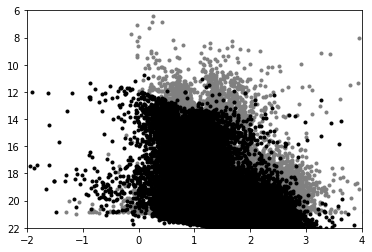

In [28]:
f, ax = plt.subplots()
ax.plot(NGC6819.data['phot_bp_mean_mag'] - NGC6819.data['phot_rp_mean_mag'], NGC6819.data['phot_g_mean_mag'],'.', color='gray')
ax.plot(NGC6819.data['g_mean_psf_mag'] - NGC6819.data['i_mean_psf_mag'], NGC6819.data['g_mean_psf_mag'],'.', color='black')
ax.set_ylim(22, 6)
ax.set_xlim(-2,4)

In [42]:
NGC6819.plotNameRoot = 'plots/'
NGC6819.verbose = 0

Finding radial-velocity members ... 
Cluster amp: 120, Cluster mean: 1.6 Cluster sigma: 0.7
Field amp: 100, Field mean: -28 Field sigma: 3
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=57.72593634, mean=1.57586114, stddev=1.93479501)>

    [1]: <Gaussian1D(amplitude=102.36072328, mean=-17.78591596, stddev=25.64655855)>
Parameters:
       amplitude_0           mean_0       ...        mean_1            stddev_1     
    ------------------ ------------------ ... ------------------- ------------------
    57.725936335428784 1.5758611370893554 ... -17.785915958385402 25.646558548033326
[ 57.72593634   1.57586114   1.93479501 102.36072328 -17.78591596
  25.64655855]


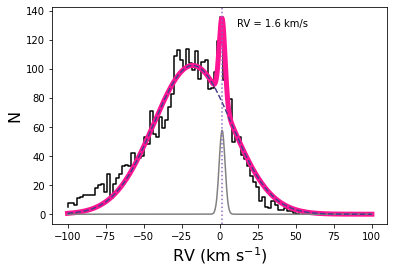

In [43]:
NGC6819.verbose = 2
NGC6819.RVparams = [120,1.6,.7, 100,-28,3]
NGC6819.getRVMembers()

Finding parallax members ... 
Amp: 400, Mean: 2700 Sigma: 5 Polynomial Deg: 6
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=44.91765459, mean=2672.27840925, stddev=86.053814)>

    [1]: <Polynomial1D(6, c0=-32.33376554, c1=0.41356605, c2=0.00086308, c3=-0.00000153, c4=0., c5=-0., c6=0.)>
Parameters:
       amplitude_0          mean_0      ...          c6_1         
    ----------------- ----------------- ... ----------------------
    44.91765459435429 2672.278409253216 ... 2.5830621068403876e-17
[ 4.49176546e+01  2.67227841e+03  8.60538140e+01 -3.23337655e+01
  4.13566053e-01  8.63079657e-04 -1.52576215e-06  9.20647223e-10
 -2.50526772e-13  2.58306211e-17]


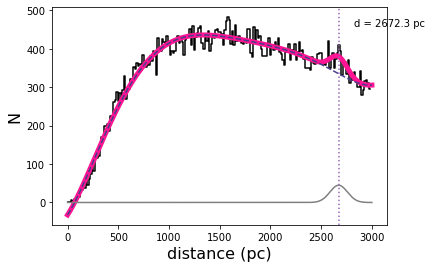

In [44]:
#NGC6819.distance = 2660.53 #pc
NGC6819.verbose = 2
NGC6819.PAparams = (400,2700,5)
NGC6819.getParallaxMembers()

finding proper-motion members ...


c:\Users\Claire\Documents\Code\BASE9_utils\getGaiaData\getGaiaData.py:542: UserWarning: The following kwargs were not used by contour: 'bins'
  norm = mplColors.LogNorm(), cmap = cm.Greys)


Cluster amp: 71.0 Cluster xmean: -2.9  Cluster ymean: -3.8  Cluster xsigma: 0.1 Cluster ysigma: 0.1 						Field amp: 1350  Field xmean: -2.5  Field ymean: -3.8  Field xsigma: 3  Field ysigma: 3
Model: CompoundModel
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian2D(amplitude=49.24238617, x_mean=-2.90751079, y_mean=-3.88740023, x_stddev=0.11146141, y_stddev=0.10917574, theta=-1.6990289e+09)>

    [1]: <Gaussian2D(amplitude=14.03098336, x_mean=-2.36580126, y_mean=-4.27853004, x_stddev=1.00408011, y_stddev=1.86099701, theta=-38.12928683)>
Parameters:
       amplitude_0          x_mean_0      ...     y_stddev_1           theta_1      
    ------------------ ------------------ ... ------------------ -------------------
    49.242386171986695 -2.907510786982882 ... 1.8609970130366906 -38.129286832083835
[ 4.92423862e+01 -2.90751079e+00 -3.88740023e+00  1.11461406e-01
  1.09175739e-01 -1.69902890e+09  1.40309834e+01 -2.36580126e+00
 -4

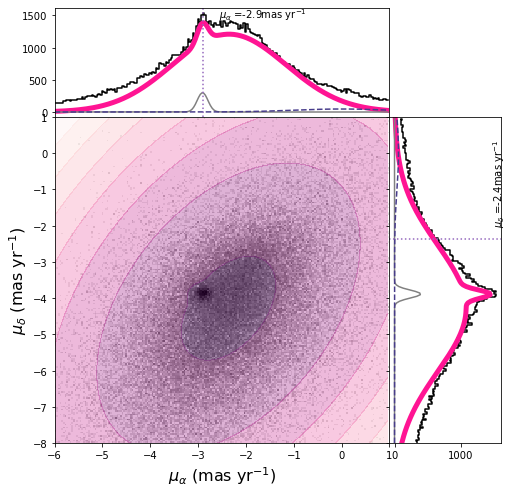

In [45]:
# this is very hard to fit for NGC 188!
#NGC6819.PMmean = [-3,-4]
NGC6819.PMxmin = -6
NGC6819.PMxmax =1
NGC6819.PMymin = -8
NGC6819.PMymax = 1
NGC6819.PMxbins = 200
NGC6819.PMybins = 200
NGC6819.PMparams= [None,-2.9,-3.8,.1,.1, 1350,-2.5,-3.8,3,3]
NGC6819.verbose = 2
NGC6819.getPMMembers()

In [46]:
NGC6819.data

source_id,ra,dec,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,parallax,teff_gspphot,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,PRV,PPa,PPM,membership
,deg,deg,mas / yr,mas / yr,km / s,mag,,mag,,mag,,mas,K,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64
2076266566193173888,295.25236581165257,39.57104101953475,-2.4096074753780066,-5.720345495348615,--,16.869741,950.54517,17.254961,171.67053,16.234373,215.5713,0.19123775117488687,--,1.336054,1,0,17.3425998687744,0.00464399997144938,16.8504009246826,0.00527000008150935,16.6200008392334,0.00329399993643165,16.5121002197266,0.00647900020703673,16.4440994262695,0.00427900021895766,15.58,0.048,15.259,0.078,15.087,0.146,0.0029826944,0.006912654,0.006296871,--,2.0326618089633084e-195,1.1228531508882107e-65,2.282380716884581e-260
2076274121030080768,295.4489694033215,39.69284557539284,-4.73611019401259,-5.34396478925974,--,19.31945,374.4482,19.861364,25.261162,18.694342,45.431305,0.011103533414176364,--,1.0893166,1,0,19.922700881958,0.0144180003553629,19.3251991271973,0.0256340000778437,19.0519008636475,0.0123089998960495,18.9311008453369,0.0156699996441603,18.8309001922607,0.01919100061059,--,--,--,--,--,--,0.0039999066,0.04307092,0.024195414,--,0.0,6.370100259155416e-96,0.0
2076314356282928000,296.1553075240006,39.855772732307415,-4.00509235598971,-6.122884126671195,--,19.797083,267.21756,20.358688,18.667744,19.224216,27.200178,0.36651824074707823,--,0.95358175,1,0,20.4706993103027,0.0575740002095699,19.7728004455566,0.0195579994469881,19.5685997009277,0.0227439999580383,19.4412002563477,0.0437560006976128,19.3293991088867,0.0474999994039536,--,--,--,--,--,--,0.004909247,0.058227967,0.040095028,--,0.09995583741006367,2.5886244941358143e-111,2.5874812905154776e-112
2076326386495096192,295.82123977611104,39.989672371920925,-3.407556263324567,-4.329111018823428,--,19.031412,449.68585,19.53153,37.28014,18.491291,58.491043,0.08897964743128783,--,1.0444802,1,0,19.5865993499756,0.0132870003581047,19.0368995666504,0.00558800017461181,18.8076992034912,0.00923299975693226,18.7187995910645,0.0228509996086359,18.665599822998,0.0291930008679628,--,--,--,--,--,--,0.0036635057,0.029257065,0.018943276,--,0.0,7.246208609284327e-08,0.0
2076354320952487936,296.11925680947166,40.11376089058507,-4.663088350963651,-5.296098421225916,--,20.35321,185.3959,20.809004,10.77041,19.679617,15.26463,0.33240334219673745,--,1.0168872,1,0,21.1424007415771,0.0371289998292923,20.3948001861572,0.0401199981570244,20.0718994140625,0.0307000000029802,19.8743991851807,0.0279879998415709,19.7226009368896,0.127187997102737,--,--,--,--,--,--,0.006472107,0.10084593,0.071227916,--,7.150692863670478e-05,6.1885147273764205e-89,4.425216809777023e-93
2076225914317021184,295.573119735533,39.64090353065577,-2.018232994159313,-5.804070403696139,--,20.329252,178.75284,21.033373,10.323545,19.580933,21.8121,0.6523808571362336,--,0.9384223,1,0,21.0939998626709,0.0285539999604225,20.32200050354,0.0347970016300678,19.9778995513916,0.016890000551939,19.8369007110596,0.0296349991112947,19.622200012207,0.043724998831749,--,--,--,--,--,--,0.006669684,0.10520787,0.049920056,--,8.837324671865757e-40,6.367178206719019e-81,5.6268821056403957e-120
2076225914317022080,295.5777695243631,39.64175597145176,-3.326139628178732

In [47]:
NGC6819.combineMemberships()

combining memberships ...


plotting CMD ...
plotting CMD ...


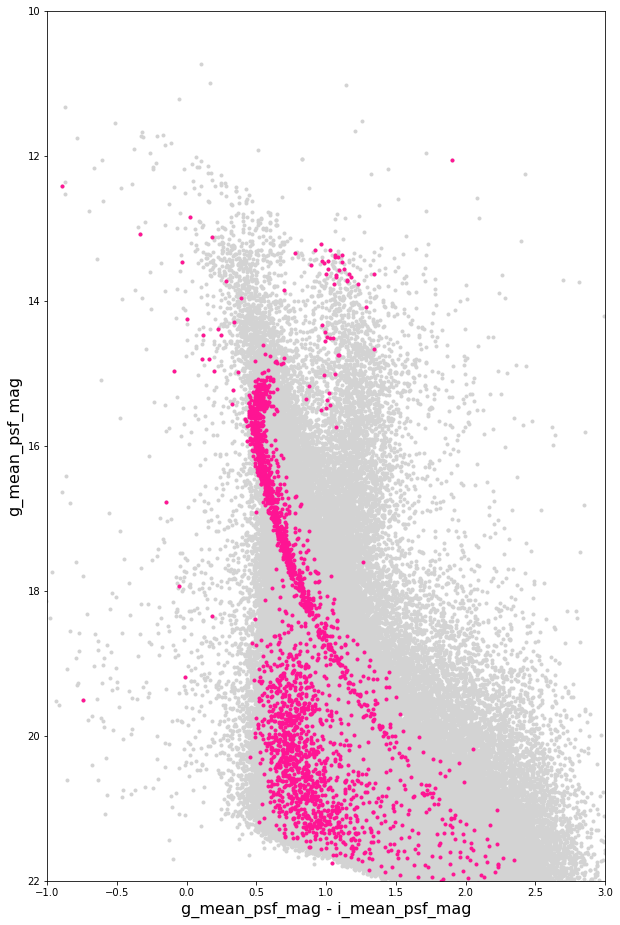

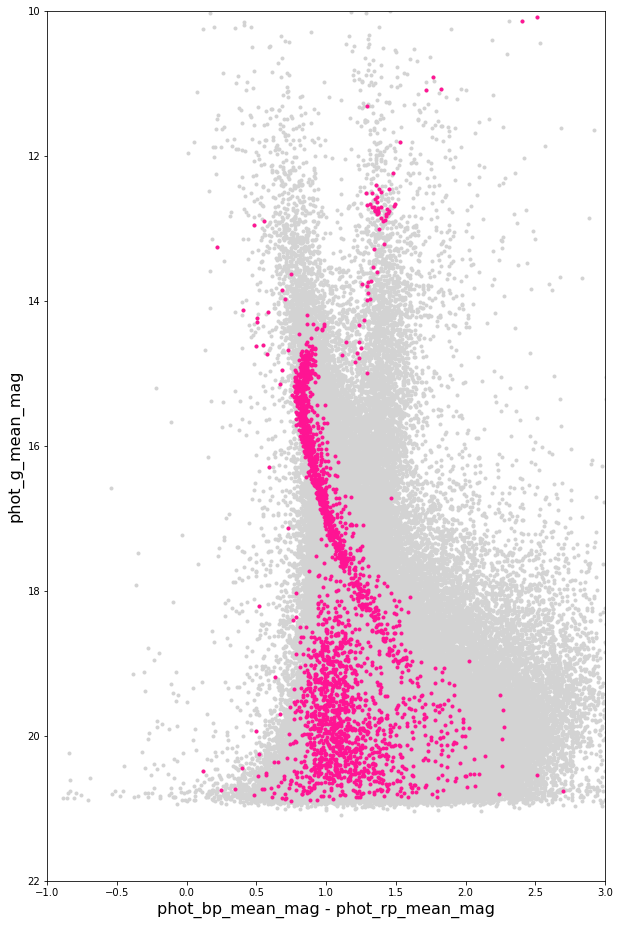

In [48]:
NGC6819.membershipMin = 0.001

NGC6819.plotCMD()
NGC6819.plotCMD(x1='phot_bp_mean_mag', x2='phot_rp_mean_mag', y= 'phot_g_mean_mag')

In [49]:
# output a .phot file for BASE-9
# I may want to rename the .py file.  When finished, upload to Drive
# double check with proposal that this is the only photometry we proposed to use
NGC6819.photOutputFileName = 'NGC6819.phot'
NGC6819.generatePhotFile()

generating phot file ...


(-2.0, 4.0)

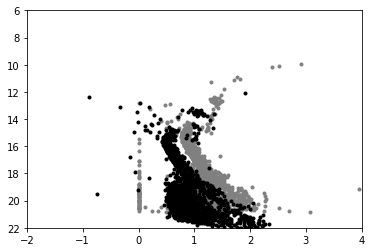

In [50]:
df = pd.read_csv(NGC6819.photOutputFileName, delimiter=' ')
f, ax = plt.subplots()
ax.plot(df['G_BP'] - df['G_RP'], df['G'],'.', color='gray')
ax.plot(df['g_ps'] - df['i_ps'], df['g_ps'],'.', color='black')
ax.set_ylim(22, 6)
ax.set_xlim(-2,4)

In [51]:
# output a base9.yaml file for BASE-9?
NGC6819.yamlOutputFileName = 'inputs/base9.yaml'
NGC6819.yamlTemplateFileName = 'template_base9.yaml'
NGC6819.yamlInputDict = {
    'photFile' : 'NGC6819.phot',
    'outputFileBase' : 'output/NGC6819',
    'modelDirectory' : 'base-models/',
    'msRgbModel' : 5,
    'Fe_H' : [0., 0., 0.3],
    'Av' : [0., 0., 0.3],
    'Y' : [0.29, 0.29, 0.0],
    'carbonicity' : [0.38, 0.38, 0.0],
    'logAge' : [10.4, 10.4, np.inf],
    'distMod' : [12.3, 12.3, 1.],
}

NGC6819.generateYamlFile()

generating yaml file ...


## Testing as pipeline

(Though it will require some tweaking for clusters to define, e.g., distance, PM, etc.)

In [4]:
# read in my OC file and see if I can use that to define the input values
# https://github.com/ageller/compileOCs/blob/master/OCcompiled_clean.csv
clusterName = 'NGC_6819'

OCdf = pd.read_csv('OCcompiled_clean_v2.csv')
row = OCdf.loc[OCdf['ID'] == clusterName].iloc[0]

# get the cluster center
center = SkyCoord(row['RA[hr]'], row['Dec[deg]'], unit=(units.hourangle, units.degree))
center.ra.to(units.degree).value

#calculate the distance modulus and error
dmod = 5.*np.log10(row['dist[pc]']) - 5.
err_dmod = (5.*1./np.log(10.)*(1./row['dist[pc]']))*row['err_dist[pc]'] # error propagation

# estimate the cluster tidal radius 
# equation from Binney and Tremaine for Jacoby Radius (8.91)
# at least for NGC 188, this seems a bit small...
# I'm adding a factor of 2 in front

# want this in degrees
Mg = 1.0*10**12 #*units.solMass #this probably could use verification and a reference
rt = row['rgc[pc]']*(row['mass[Msun]']/(3.*Mg))**(1./3.)
rtfac = 5.
radius = rtfac*np.arctan2(rt, row['dist[pc]'])*180./np.pi
print(radius, rt, dmod, err_dmod)
                  
# Note: many clusters won't have Av (and other values)
# for Av, I can get a value from a model, or just use 0

0.7247791687195356 6.004232237311381 11.876717447727362 0.04364351832397066


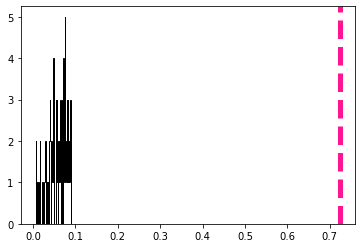

In [37]:
# quick check on the calculated tidal radius
f, ax = plt.subplots()
_ = ax.hist(NGC6819.members['rCenter'].data, histtype='step', color='black', bins = 100)
ax.axvline(radius, ls='dashed', lw=5, color='deeppink')

In [38]:
row

ID                      NGC_6819
RA[hr]              19 41 18.480
Dec[deg]            40 11 24.000
ID_Simbad               NGC_6819
ID_MWSC                 NGC_6819
ID_WEBDA                NGC_6819
ID_Piskunov                  NaN
ID_Kharchenko           NGC_6819
ID_Salaris              NGC_6819
ID_vandenBergh          NGC_6819
ID_Cantat-Gaudin        NGC_6819
ID_Lynga                NGC_6819
dist[pc]                 2373.25
err_dist[pc]           47.698962
N_dist[pc]                   6.0
age[Myr]              1926.03254
err_age[Myr]          536.781437
N_age[Myr]                   5.0
[Fe/H]                      0.05
err_[Fe/H]              0.096954
N_[Fe/H]                     1.0
mass[Msun]               1221.75
err_mass[Msun]        785.718551
N_mass[Msun]                 4.0
rgc[pc]                  8100.35
err_rgc[pc]            56.321055
N_rgc[pc]                    2.0
rhm[pc]                  2.37255
err_rhm[pc]             0.644297
N_rhm[pc]                    1.0
Av[mag]   

In [25]:
# I should test with reading in from my compiled OC list
cluster = GaiaClusterMembers(center.ra.to(units.degree).value, center.dec.to(units.degree).value, radius)
cluster.plotNameRoot = 'plots/'
cluster.distance = row['dist[pc]'] #pc
########
# this is not in my table.  I may want to work on making the code more robust so this is not needed
cluster.PMxmin = -10
cluster.PMxmax = 10
cluster.PMymin = -8
cluster.PMymax =-1
#cluster.PMmean = [-2.5, -1]
cluster.PMxbins = 200
cluster.PMybins = 200
########
cluster.membershipMin = 0.01
cluster.verbose = 1
cluster.photOutputFileName = 'inputs/' + clusterName + '.phot'
cluster.yamlOutputFileName = 'inputs/base9.yaml'
cluster.yamlTemplateFileName = 'template_base9.yaml'
cluster.yamlInputDict = {
    'photFile' : 'inputs/' + clusterName + '.phot',
    'outputFileBase' : 'output/' + clusterName,
    'modelDirectory' : 'base-models/',
    'msRgbModel' : 5,
    'Fe_H' : [row['[Fe/H]'], row['[Fe/H]'], np.max([row['err_[Fe/H]'], 0.3])],
    'Av' : [row['Av[mag]'], row['Av[mag]'], np.max([row['err_Av[mag]'], 0.3])],
    'Y' : [0.29, 0.29, 0.0], # keep the defaults
    'carbonicity' : [0.38, 0.38, 0.0], # keep the defaults
    'logAge' : [np.log10(row['age[Myr]']*10**6), np.log10(row['age[Myr]']*10**6), np.inf],
    'distMod' : [dmod, dmod, np.max([err_dmod, 1.0])],
}
cluster.runAll()

NameError: name 'center' is not defined

## Try reading in the existing phot file and outputting a sampled version

for time testing

In [3]:
from astropy.io import ascii
import numpy as np

In [ ]:
gen = GaiaClusterMembers()
data = ascii.read('inputs/NGC_188.phot')
data

id,G,G_BPft,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,H_2M,Ks_2M,sigG,sigG_BPft,sigG_RP,sigg_ps,sigr_ps,sigi_ps,sigz_ps,sigy_ps,sigJ_2M,sigH_2M,sigKs_2M,mass1,massRatio,stage1,CMprior,useDBI
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,int32
110520001,10.0564,11.1854,9.0079,11.522,10.6138,9.671,9.0908,9.0991,7.466,6.599,6.4,0.01,0.01,0.01,0.0737,0.047,0.0595,0.0767,0.0725,0.026,0.033,0.026,0.0,0.0,1,0.203,1
104710002,10.7909,11.6393,9.8907,99.9,99.9,99.9,99.9,99.9,8.58,7.892,7.652,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.026,0.038,0.023,0.0,0.0,1,0.272,1
110470003,11.0748,11.9459,10.1629,99.9,99.9,99.9,99.9,99.9,8.889,8.098,7.909,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.027,0.053,0.02,0.0,0.0,1,0.277,1
106630004,11.1288,11.8191,10.3309,99.9,99.9,99.9,99.9,99.9,9.292,8.597,8.441,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.029,0.042,0.023,0.0,0.0,1,0.192,1
100250005,11.6651,12.2491,10.9395,99.9,99.9,99.9,99.9,99.9,9.966,9.398,9.26,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.027,0.029,0.021,0.0,0.0,1,0.179,1
101610006,11.9237,12.5855,11.1456,99.9,99.9,99.9,99.9,99.9,10.098,9.461,9.304,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.025,0.03,0.019,0.0,0.0,1,0.118,1
108930007,11.993,12.5921,11.2606,99.9,99.9,99.9,99.9,99.9,10.252,9.768,9.62,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.025,0.034,0.02,0.0,0.0,1,0.272,1
100540008,12.0495,12.6406,11.3226,99.9,99.9,99.9,99.9,99.9,10.349,9.789,9.639,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.025,0.031,0.021,0.0,0.0,1,0.225,1
109210009,12.0802,12.6695,11.3557,99.9,99.9,99.9,99.9,99.9,10.403,9.837,9.702,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.027,0.031,0.021,0.0,0.0,1,0.24,1


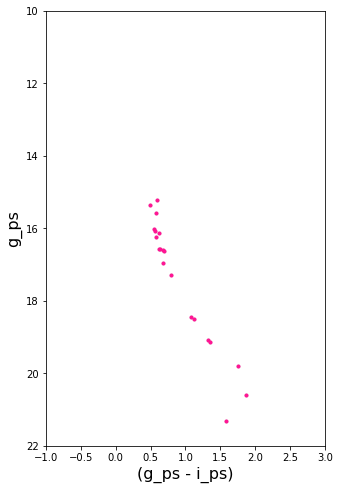

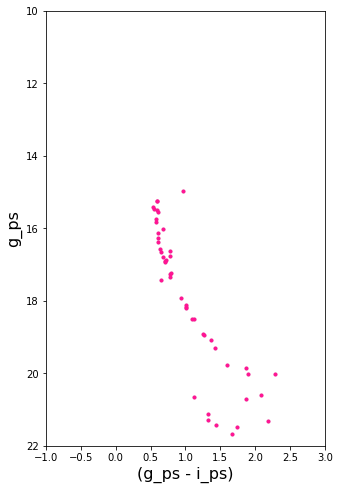

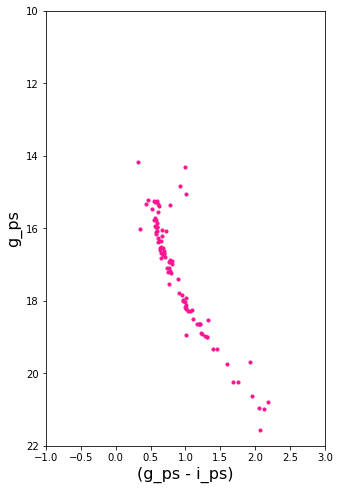

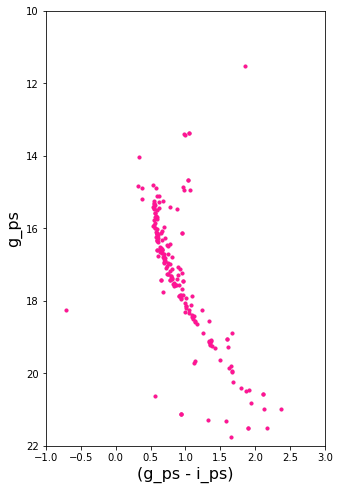

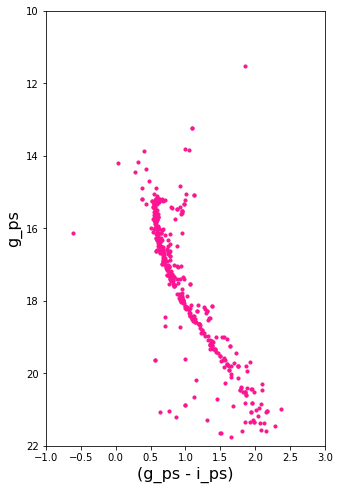

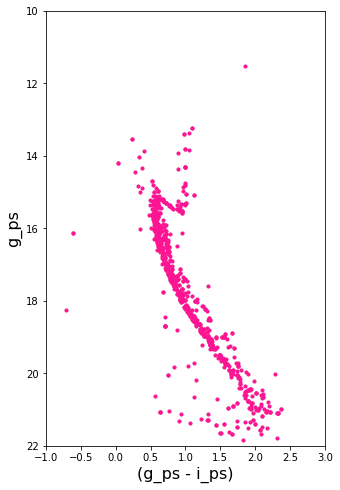

In [ ]:
sizes = [20, 50, 100, 200, 500, 1000]
for s in sizes:
    indices = np.random.choice(np.arange(0,len(data)), size=s)
    foo = data[indices]
    gen.plotCMD(data=foo, x1='g_ps', x2='i_ps', y='g_ps', m='CMprior', savefig=False)
    gen.dumpPhotFile(foo, filename='inputs/NGC6819_'+str(s)+'.phot')